In [9]:
#Modules to install via pip pandas,ipynb
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import json
from pprint import pprint
import os
import import_ipynb
import sys
sys.path.append('../')
from functions import *
from pandas.plotting import scatter_matrix


Using function to import datas

In [10]:
dataList=coojaJsonImporter("./traces")
test1BH1=dataList[0]
test1BH2=dataList[1]
testNorm =dataList[2]
data=[]
cases=[
      "Black Hole Network 1",
        "Black Hole Network 2",
    "Normal Network"
      ]
colors = [ 'orange','dodgerblue', 'green','violet']
for nodeList in dataList:
    data.append(createNodes(nodeList))


#All data collection is in variable node that is a list of list of nodes
#3 nets input x 9 nodes by net
data[0][0].pkts[1:5]

print(getPings(data))


Importing test_1BH_2018-11-09_12_31_25.json
Importing test_nom_2018-11-09_08_55_11.json
Importing test_1BH_2018-11-09_14_37_46.json
[99, 100, 97]


In [11]:
print(len(data))
pprint((data[0][0].pkts.head()))

3
   pkt     rtt
0  0.0  1342.0
1  1.0  8170.0
2  2.0   973.0
3  3.0   848.0
4  4.0  1022.0


We print in 9 different Graph the packets RTT in Normal case, Black Hole 1 case and Black Hole 2 case, we can check that packets are missing from the graph

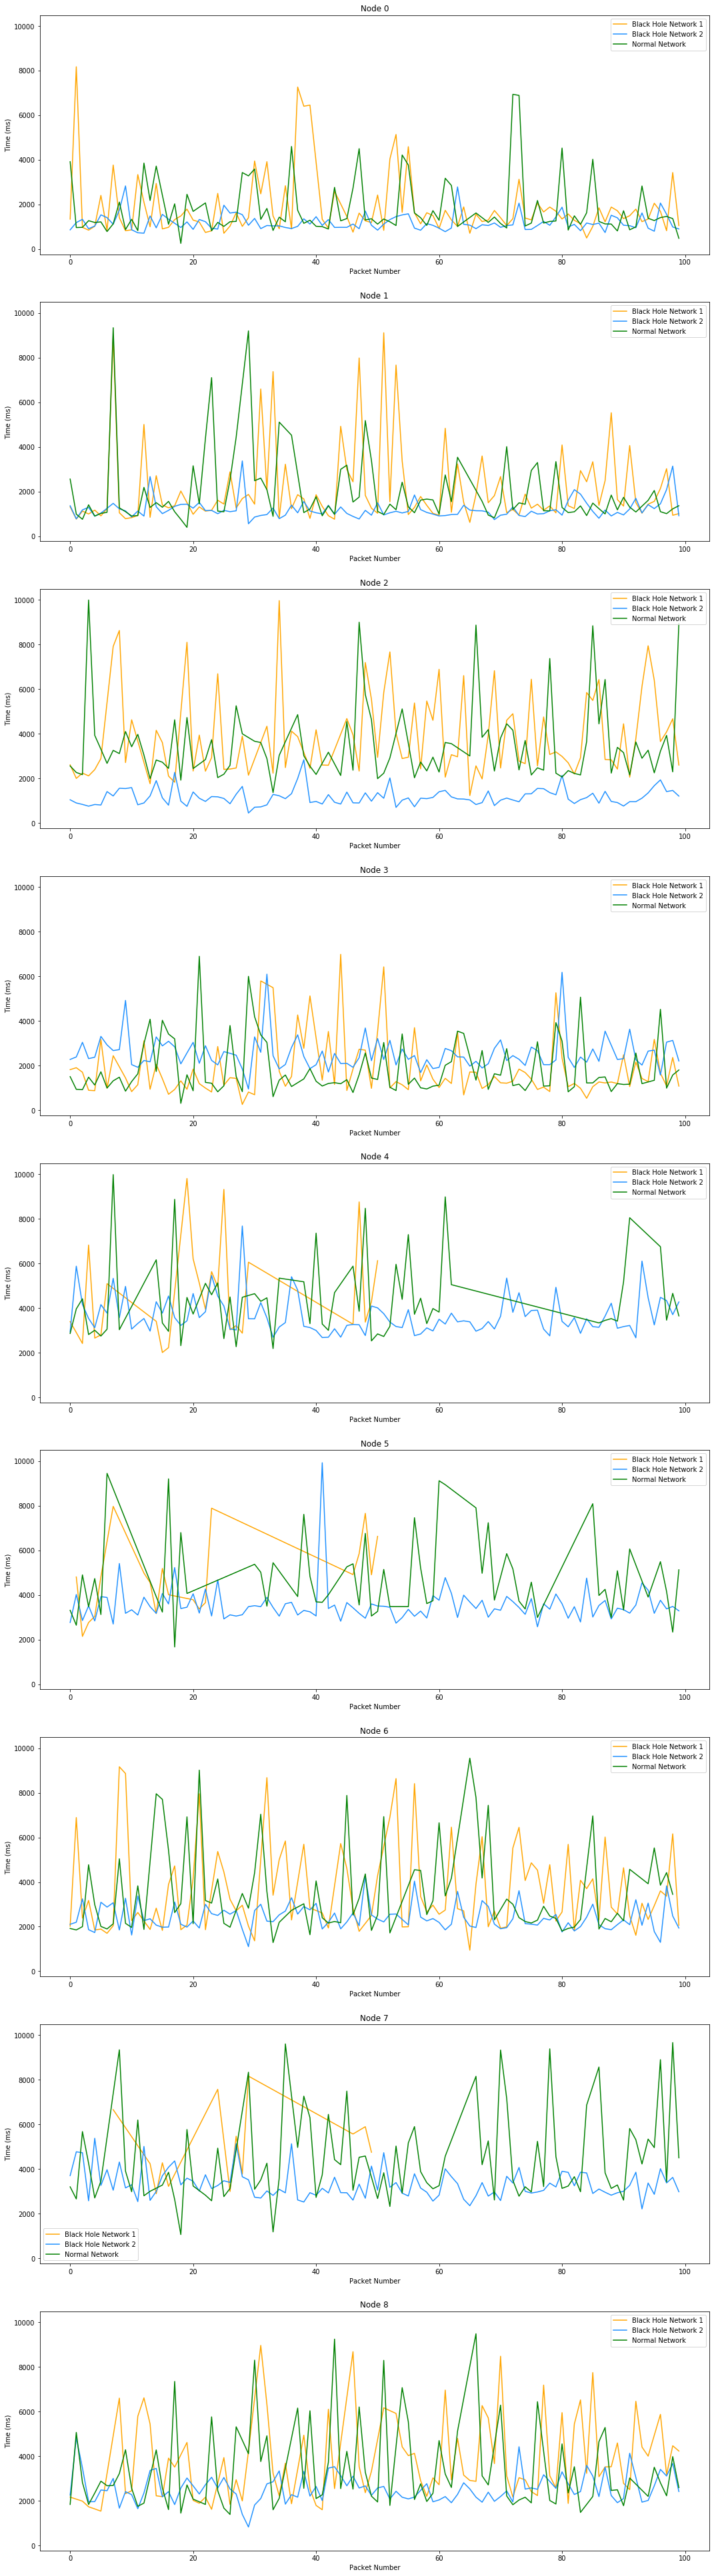

In [12]:
range(len(data))
fig, axs= plt.subplots(9,1, figsize=(18,70),sharey=True, )
for i in range(len(data)):
    for j in range(len(data[i])):
        axs[j].plot(data[i][j].pkts["pkt"],data[i][j].pkts["rtt"],label=cases[i],color=colors[i]   )
        axs[j].set_title("Node "+ str(j))
        axs[j].set_xlabel("Packet Number")
        axs[j].set_ylabel("Time (ms)")
        axs[j].legend()   
plt.show()

Distibution of the delay divided by Node in the differents Cases

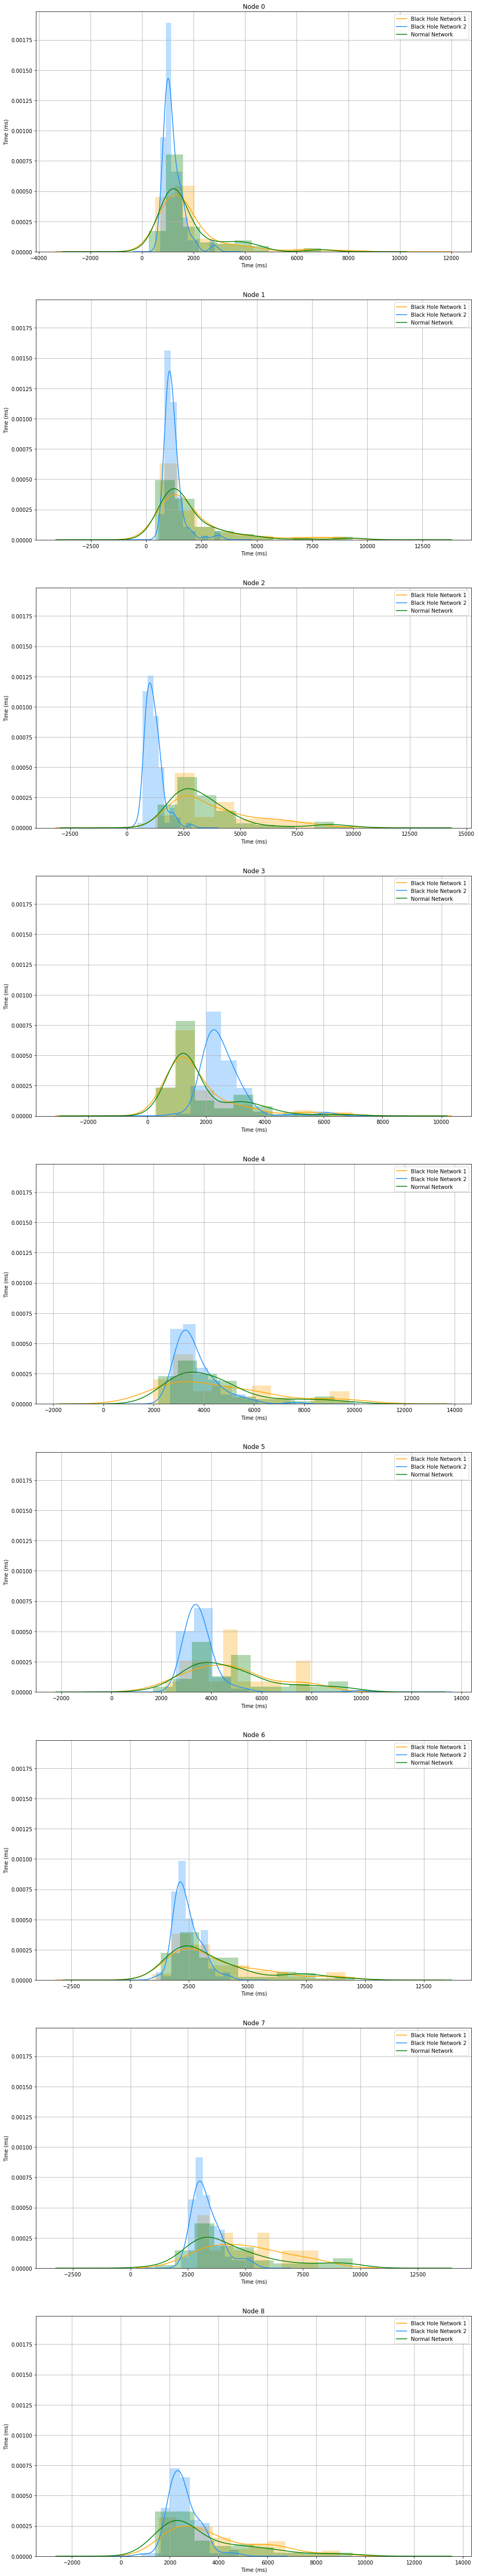

In [13]:
fig, axs= plt.subplots(len(data[0]),1, figsize=(15,90),sharey=True, )
for i in range(len(data)):
    for j in range(len(data[i])):
        data[i][j].pkts["rtt"].plot.kde(
            ax=axs[j],
            label=cases[i],color=colors[i]
        )
        axs[j].set_ylabel("Time (ms)")
        data[i][j].pkts["rtt"].hist(density=True,alpha=0.3, ax=axs[j],color=colors[i])
        axs[j].set_title("Node "+ str(j))
        axs[j].set_xlabel("Time (ms)")
        axs[j].legend()

Density of outliers in every node by Case

In [ ]:
fig, axs= plt.subplots(len(data),len(data[0]), figsize=(30,10),sharey=True, )
for i in range(len(data)):
    for j in range(len(data[i])):
        out=getOutliers(data[i][j].pkts)
        if not out.empty :
            ax=axs[i][j]
            out["rtt"].plot.kde(
            ax=ax,
            label=cases[i],
                 color=colors[i]
        )
            ax.set_ylabel("Density")
            out["rtt"].hist(density=True,alpha=0.3, ax=ax, color=colors[i])
            ax.set_title("Node "+ str(j))
            ax.set_xlabel("Time (ms)")
            ax.legend()

Density of delay without outliers in every node by Case

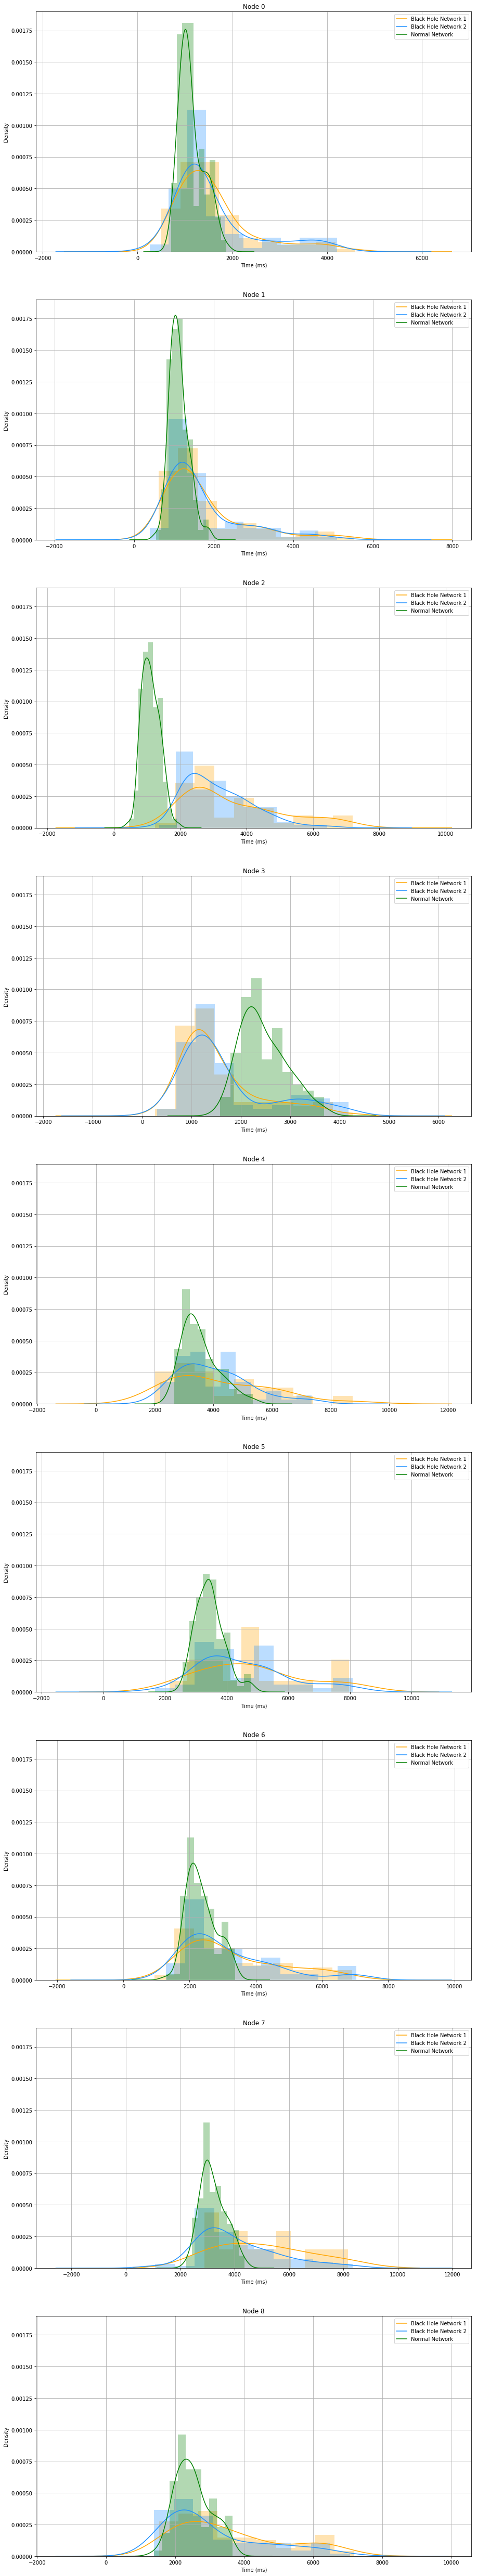

In [61]:
fig, axs= plt.subplots(len(data[0]),1, figsize=(15,90),sharey=True, )
for i in range(len(data)):
    for j in range(len(data[i])):
        out=getStdValues(data[i][j].pkts)
        if not out.empty :
            ax=axs[j]
            out["rtt"].plot.kde(
            ax=ax,
            label=cases[i],
                 color=colors[i]
        )
            ax.set_ylabel("Density")
            out["rtt"].hist(density=True,alpha=0.3, ax=ax, color=colors[i])
            ax.set_title("Node "+ str(j))
            ax.set_xlabel("Time (ms)")
            ax.legend()

Data Preparation for Plot by hop

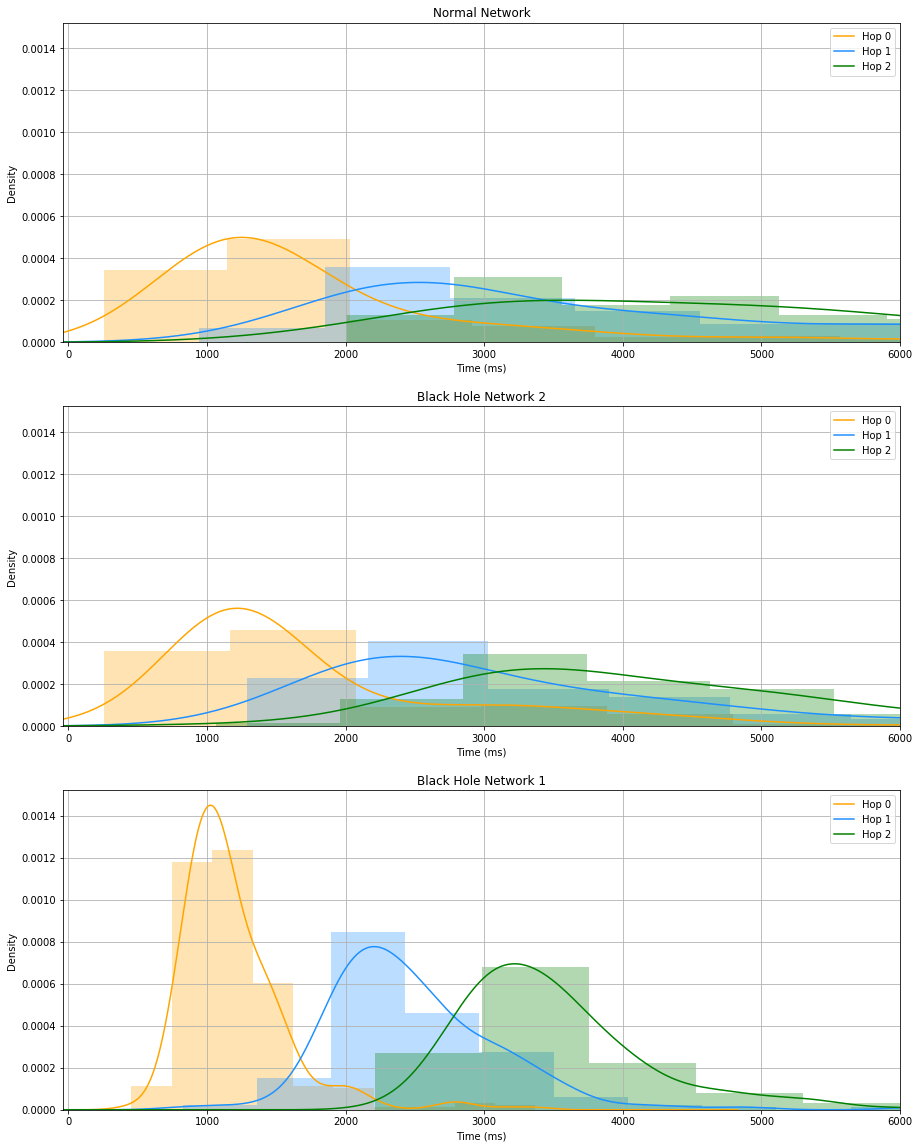

Division by Hop in the 3 cases

In [58]:
#Distribution of the delay in correlation with the Cases
printDensitybyHop(data,(15,20),"density")
#Distribution of the delay in correlation with the Hops
printDensitybyCase(data,(15,20),"density")
printDensityByHop(data,(15,20),"densitybyHop")
printBigPlot(data,(18,60),"matrix")


NameError: name 'printDensitybyHop' is not defined

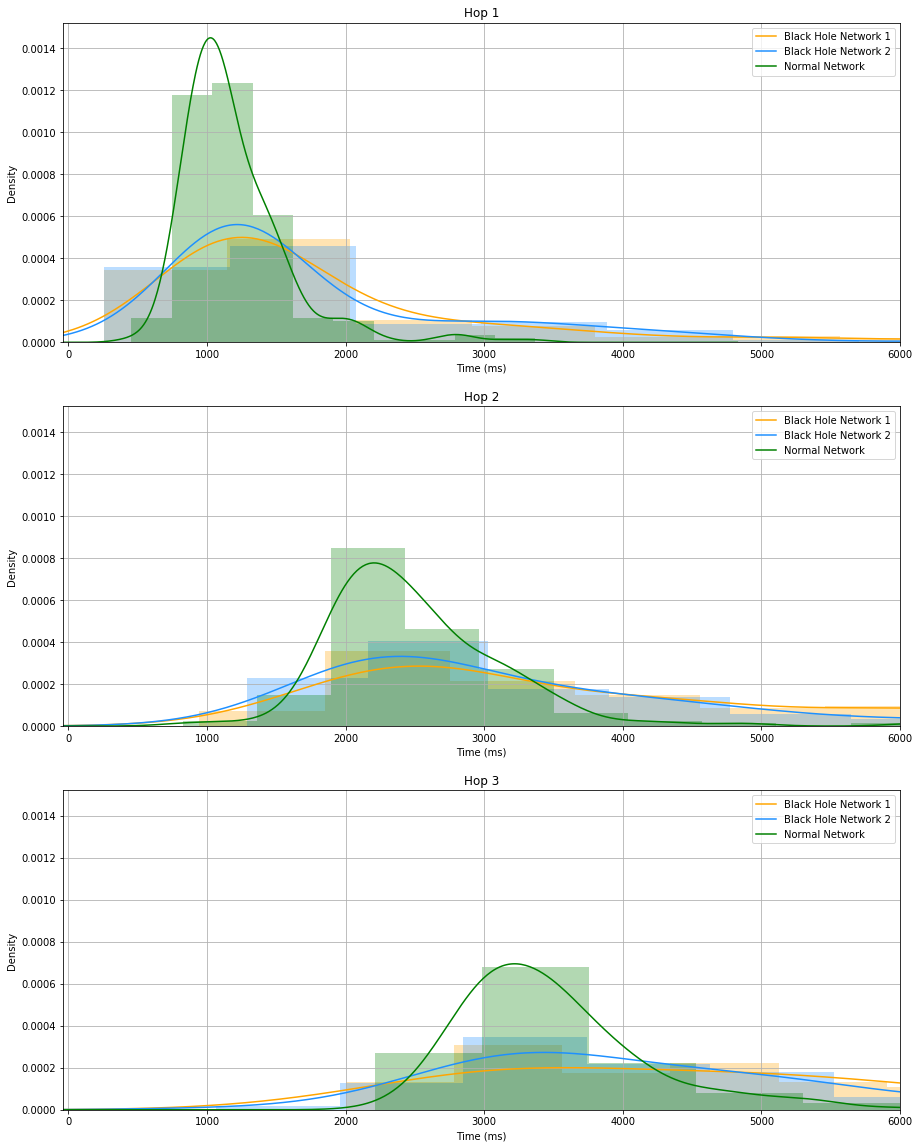

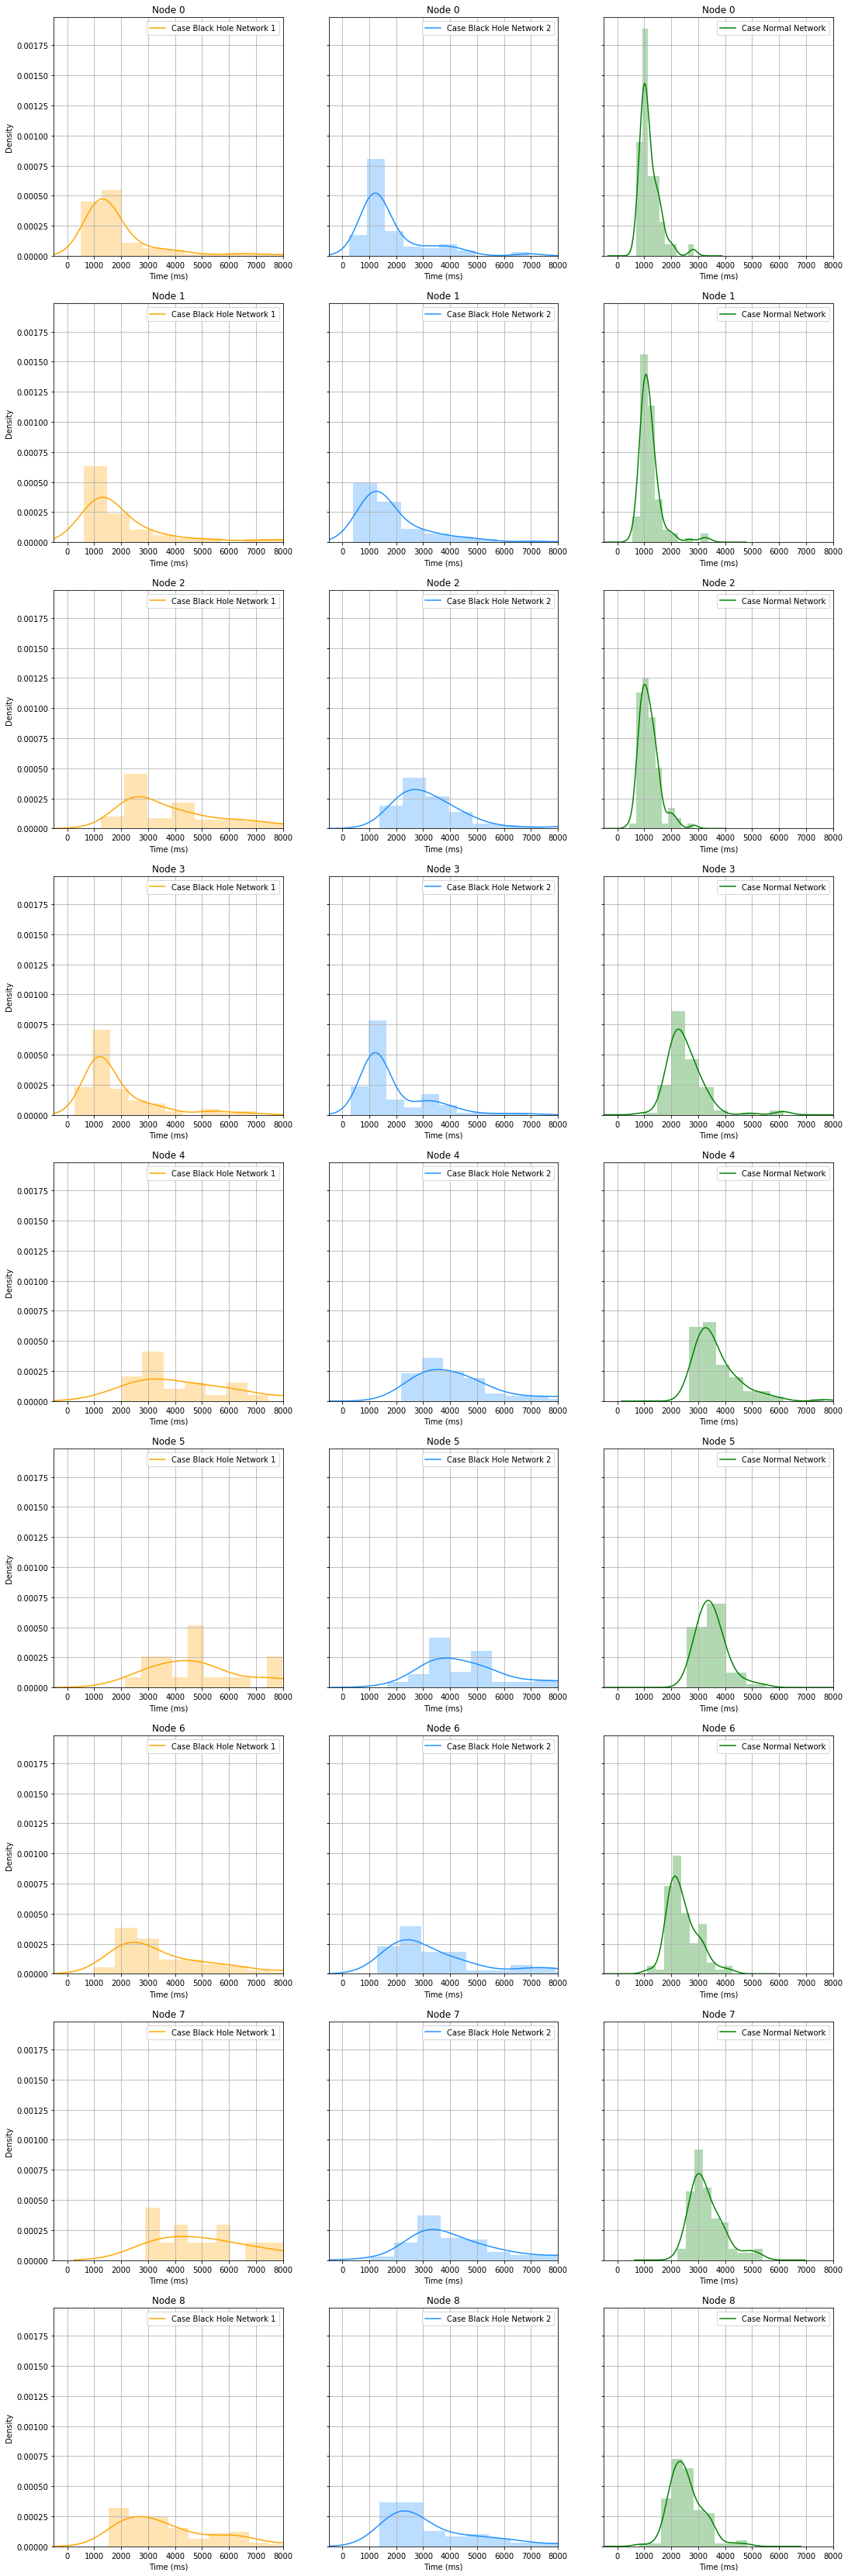